# Use Evidence Accumulation Clustering on MetaBAT

## Goal


$\bullet$ Average out biases

$\bullet$ Reduce variance

$\bullet$ Avoid overfitting

$\bullet$ Improve generalizability and robustness

## Strategy

#### Apply one of Ensemble Clustering Method on MetaBAT --- Evidence Accumulation Clustering

$\bullet$ Run N times MetaBAT on the same dataset.

$\bullet$ Create a membership matrix which can record the binning membership for each contig  

$\bullet$ Record how many times each pair was clustered and create the co-association matrix

    - For each run, group the row number together which share the same membership
    - Label the pairs as 1 if they are in the same membership
    - Get N sparse matrix and then average them co_assoc(i,j) = votes(i,j)/N
    - Get the final similarity sparse matrix 
    - The larger value shows contigs highly likely to be in the same cluster
    
####  In order to test if the algorithm can work well, run the algorithm on the subsample of the data first. 
$\bullet$ Subsample from the synthetic data which contains 195,601 contigs from 291 genomes
    - Remove the genomes which have extreme number of contigs (>1000 or < 300)
    - After removing, there are 250 genomes left in total
    - Randomly choose 100 contigs from each genome ==> 25,000 contigs were finally chosen
    - Sum the size of the contigs for each genome
    - Get the summed size as range of 280k to 760k per genome
    - Go through each genome and remove the contigs with larger size until the total size 
      of each genome can be between 280k and 330k. 
    - Finally obtain 20466 contigs in total as the sample

#### Apply hierachical clustering on the similarity matrix of the sample data
$\bullet$ Minimum spanning tree is one of the divisive hierarchical clustering methods, which start in one cluster and splits recursively as one moves down the hierachy

$\bullet$ Use the number of times the two samples clustered together as the edge weights and obtain the weights from the co-association matrix

$\bullet$ Apply MST and remove the edges with a weight smaller than the given threshold


## Result

When using N = 200, which means running 200 times MetaBAT on the same subsample dataset, the following plot shows the F1 score for each-time running. We can see the best F1 score from the one-time run Metabat has the value about 0.85 and has 28 clusters in total. 

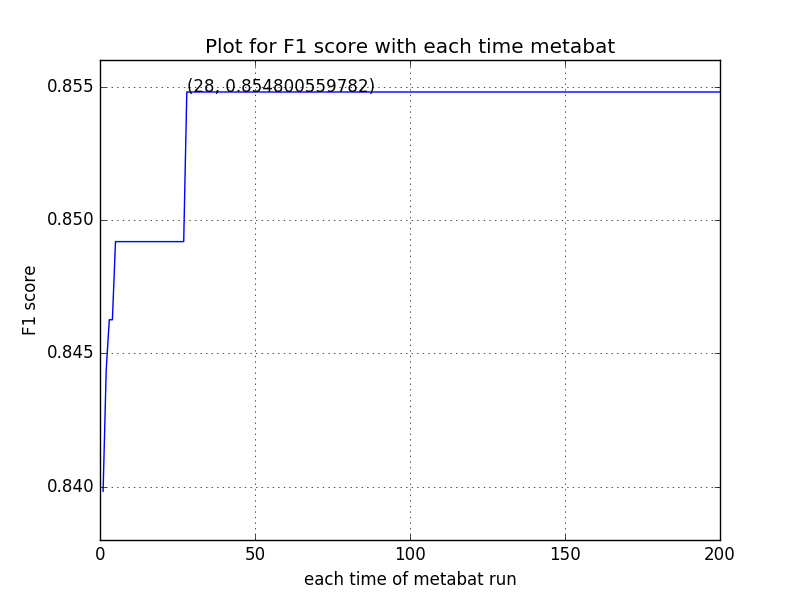

In [9]:
from IPython.display import Image
Image(filename='onetimef1score.png')

After using the Evidence Accumulation Clustering strategy, the following plot shows the relationship between the precision, recall and f1 score with the threshold choosing. We can see the best F1 score is about 0.90 when threshold is small, which is larger than the value of best one-time MetaBAT (0.85). This can tell us the strategy of the Evidence Accumulation Clustering works well on the subsample data. We can use it on the full dataset at the next step.  

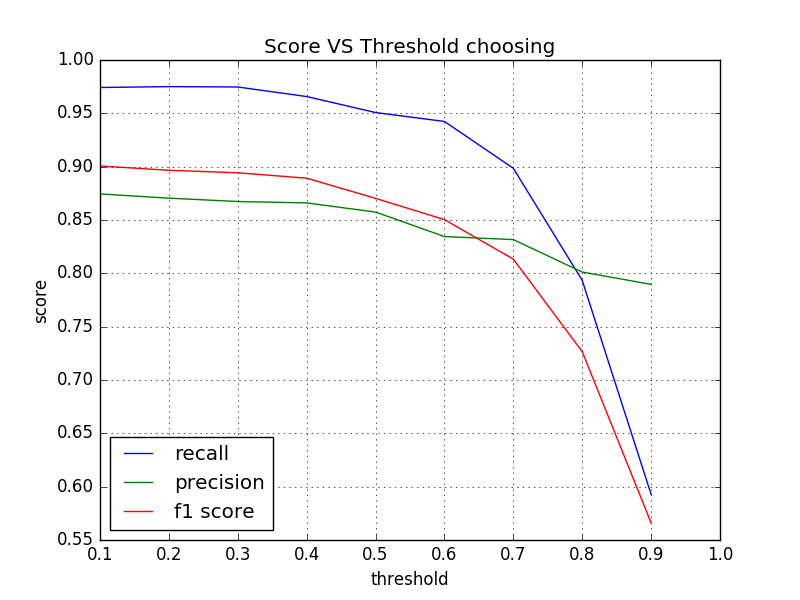

In [8]:
Image(filename='score.png')

The plot of relationship between running times N and the F1 score is still generating. 

## Appendix

In [4]:
import pickle
from IPython.display import display, HTML
## Membership matrix
meta = pickle.load(open('meta.p','rb'))
display(meta)

,contigs,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gi|224815735|ref|NZ_ACGB01000001.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gi|224815736|ref|NZ_ACGB01000002.1|_[Acidamino...,98.0,77.0,34.0,25.0,21.0,81.0,106.0,96.0,65.0,...,26.0,26.0,75.0,81.0,130.0,126.0,62.0,49.0,114.0,104.0
7,gi|224815737|ref|NZ_ACGB01000003.1|_[Acidamino...,98.0,77.0,34.0,25.0,21.0,81.0,106.0,96.0,65.0,...,26.0,26.0,75.0,81.0,130.0,126.0,62.0,49.0,114.0,104.0
8,gi|224815737|ref|NZ_ACGB01000003.1|_[Acidamino...,98.0,77.0,34.0,25.0,21.0,81.0,106.0,96.0,65.0,...,26.0,26.0,75.0,81.0,130.0,126.0,62.0,49.0,114.0,104.0
9,gi|224815738|ref|NZ_ACGB01000004.1|_[Acidamino...,98.0,77.0,34.0,25.0,21.0,81.0,106.0,96.0,65.0,...,26.0,26.0,75.0,81.0,130.0,126.0,62.0,49.0,114.0,104.0
